In [27]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(ggplot2)

In [28]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [29]:
sessions_data <- read_csv("data/sessions.csv")
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


first git commit ^

In [30]:
dim(players_data)
dim(sessions_data)

[1] 196   7

[1] 1535    5

In [31]:
summary(players_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [32]:
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

# **1) Data Description**
   **Players Data**: In the player data there are 7 variables (experience, subscribe, hashedEmail, played hours, name, gender, and age). The data is tidy where each colum represents one variable and each row contains one column.
   (see "summary(players_data)" for summary of data)
## In players.csv it is data about the demographic of the individual players, their subscription status, and played time.
There are 196 observations in 7 columns, the variables of the columns are: experience, subscribe, hashedEmail, played_hours, name, gender, and Age.

- experience is a character variable with 5 categories: amateur, beginner, pro, regular, and veteran. This variable describes the individuals experience level at Minecraft.
- subscribe is a logical variable with 2 categories: true or false. This variable tells us if the player is subscribed to the newsletter(true) or not(false).
- hashedEmail is a character variable. This variable acts as a unique identifier for each player.
- played_hours is a double variable. This variable tell us the individuals play time on the Minecraft server.
- name is a character variable. This variable is telling us each individual players name.
- gender is a character variable. This variable is telling us each individuals gender.
- Age is a double variable. This variable is telling us each individuals age.

   **Sessions Data**: In the session data there are 5 variables (hashedEmail, start time, end time, original start time, and original end time). The data is tidy but for the question I will be answering I would like to only work with one type of the time values. I will select for the start_time and end_time columns since the data is formatted in a readable way versus the original_start_time and original_end_time columns which are in Unix timestamp format.
   (see "summary(sessions_data)" for summary of data)
## In sessions.csv it is data of each individual player and their play session information.
There are 1,535 observations in 5 columns, the variables of the columns are: hashedEmail, start_time, end_time, original_start_time, original_end_time.

- hashedEmail is a character variable. This variable acts as a unique identifier for each player.
- start_time is a character variable. This variable tells us the start time of the play session.
- end_time is a character variable. This variable tells us the end time of the play session.
- original_start_time is a numeric variable. This variable tell us the original start time of the play session in Unix timestampe format.
- original_end_time is a numeric variable. This variable tell us the original end time of the play session in Unix timestamp format.

In [33]:
sessions_data <- sessions_data |>
select(hashedEmail, start_time, end_time)
sessions_data

hashedEmail,start_time,end_time
<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49


second git commit ^

In [34]:
head(players_data)
head(sessions_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time
<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10


# **2)Questions**
**I chose broad question 1:** 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**My specific question I formulated based off this question is:** 
Can the player's experience level, total hours played, Age, and gender predict whether they are going to subscribe to the game newsletter in the players.csv data set?

**The explanatory variables are:** experience, played_hours, Age, and gender.

**The response variable is:** subscribe.

**How will this data help me answer my question:**
the players.csv data contains all these variables, when using predictive models these variables will be useful to show us the relationship between the explanatory variables and response variable.

**How I plan to wrangle data to fit into predictive model:**
I will need to convert the categorical variables like experience and gender to factors so they can be used in predictive models, so I will use mutate. I will make sure there are no missing observations in the data set in any of the columns and if there are I will remove the rows before using a predictive model. I will scale any numerical observations if needed before predicivive modeling. I will make training and testing sets in order to determine the accuracy of the predictive model.


third git commit ^

# **3)Exploratory Data Analysis and Visualization**

I already loaded the data into R and read both data sets(see above)

The players.csv data was tidy so no changes needed, the sessions.csv data contained many columns of the timestampes of play time from the players so I just selected for the timestamp variable columns I wanted(see above).

I will use summarize to get the mean values of the quantitave variables(Age and played_hours) in the players.csv data set(see below).

I will make a histogram visualization of the played_hours, this will provide insight for if players that subscribed tend to play more or less hours.

I will make a hisogram of the age to provide insight as to if the players that subscribed were on the older or younger end of the age range.

I will then make a box plot of the played hours vs subscribe, this will provide insight to see if being subscribed or not determined the amount of played hours.

I will lastly make a bar plot of the experience vs subscribed to provide insight of if more or less expereinced players subscribed or not.


In [35]:
players_summary <- players_data |>
summarize(mean_played_hours = mean(played_hours, na.rm= TRUE),
          mean_age = mean(Age, na.rm= TRUE))
players_summary

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


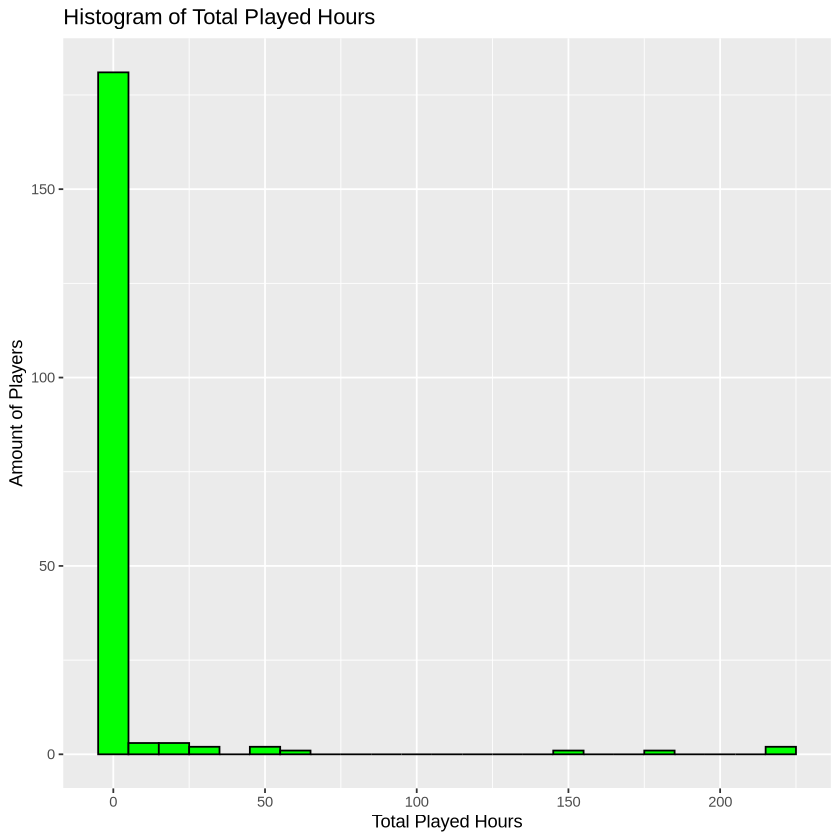

In [36]:
ggplot(players_data, aes(x= played_hours))+
geom_histogram(binwidth= 10, fill= "green", color= "black")+
labs(title = "Histogram of Total Played Hours",
     x= "Total Played Hours",
     y= "Amount of Players")

Here is the distribution of the total played hours compared to the amount of players. The insights we get form this is that the majority of the players had under 25 hours of play time.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


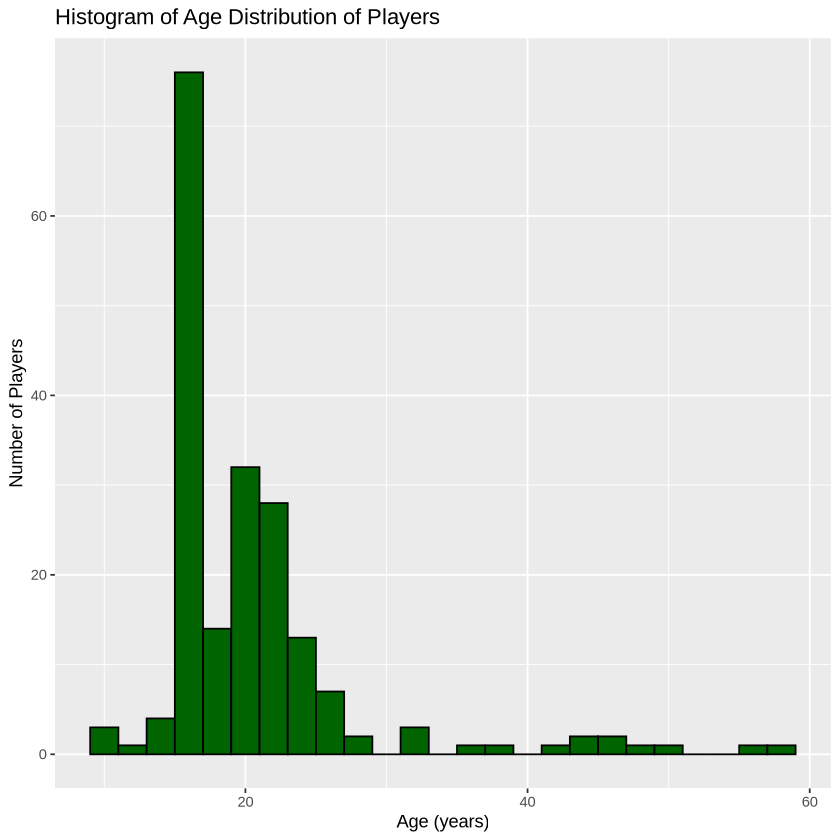

In [37]:
ggplot(players_data, aes(x= Age))+
geom_histogram(binwidth = 2, fill= "darkgreen", color= "black")+
labs(title= "Histogram of Age Distribution of Players",
     x= "Age (years)",
     y= "Number of Players")

Here we see the age distribution of players. The insights we get from this is that most of the players tend to be under 30 years old.

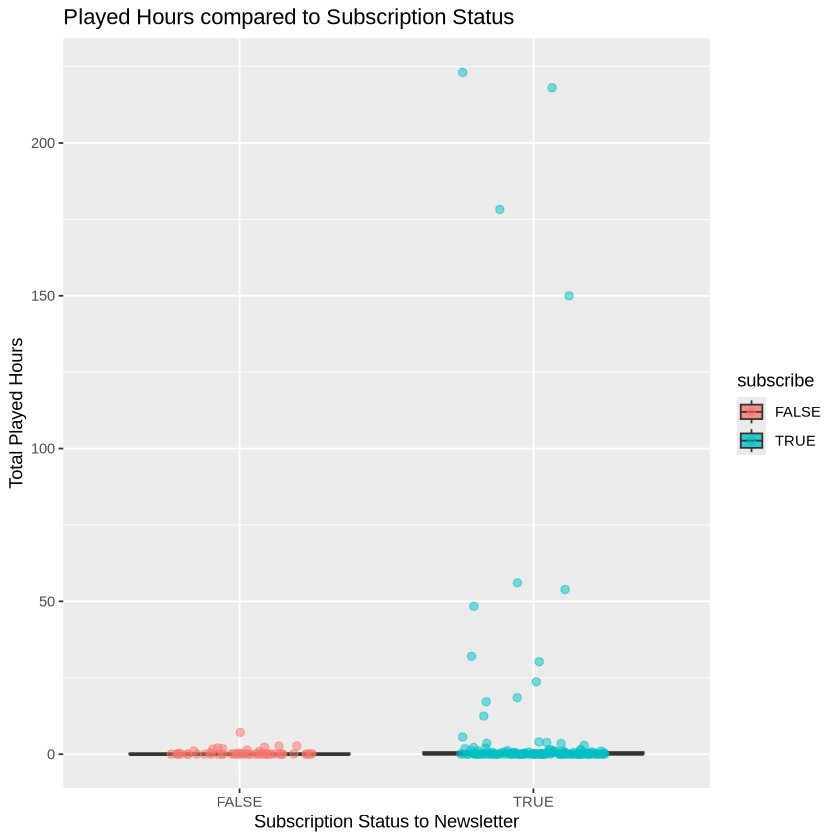

In [38]:
ggplot(players_data, aes(x= subscribe, y= played_hours, fill= subscribe))+
geom_boxplot(alpha= 0.8, outlier.shape= NA)+
geom_jitter(aes(color= subscribe),width= 0.25, alpha= 0.5, size = 2)+
labs(title= "Played Hours compared to Subscription Status",
     x= "Subscription Status to Newsletter",
     y= "Total Played Hours")

Here is the box plot of the subscribed players and their play time. I added geom_jitter along with using geom_boxplot because at first the graph just had a bunch of dots at the bottom and it wasn't a good visualization of each individual dot so this made it a bit easier to see the amount of dots. The insight we get from this is that unsubsribed players have very little play time with all of them having less than 12.5 hours of play time, and the subscribed players have more play time, a lot of them are still under 50 hours but there are a few outliers that exceed 150 hours. 

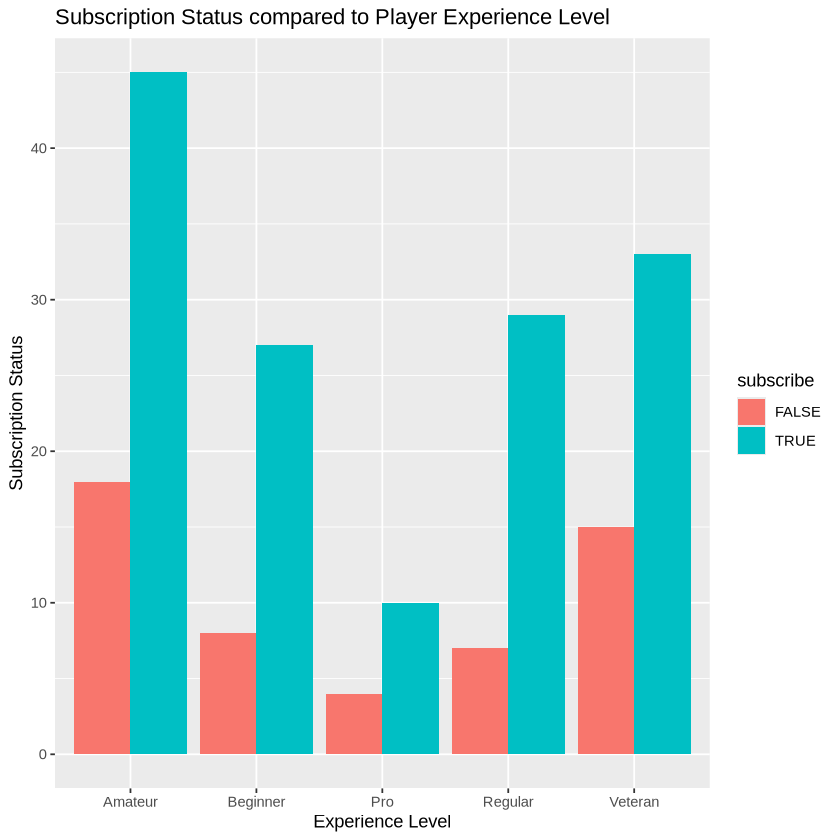

In [39]:
ggplot(players_data, aes(x= experience, fill= subscribe))+
geom_bar(position= "dodge")+
labs(title= "Subscription Status compared to Player Experience Level",
     x= "Experience Level",
     y= "Subscription Status")

Here we see the expereince levels of the players and the proportion of them who are subscribed or not to the newsletter. We can see that a lot of the amateur players are subscribed then the next most subscribed are the veteran players. This provides us with the insight that the subscription status of the player may not correlate to their experience level.

fourth git commit ^

fifth git commit ^

# **4) Methods and Plan** (Proposal)
To answer the specific question I formulated, I thing that using K Nearest Neighnors Classification will be the best predictive model to answer it.

**Why is this method appropriate?**
KNN allows for categorical and numerical variables to be used in the classificataion. Since the players.csv data set contains categorical variables (subscribe), as well as numerical ones, I think this model will be the best.

**Which assumptions are required, if any, to apply the method selected?**
I am assuming that players with similar demographics or characteristics will have similar behaviors, for this case it is that they will either subscribe/not subscribe to the newsletter. 
KNN will be useful for this because it is predicting the classification based off the explanatory variables. So the data points that are closer together means they have more similar characteristics.
Using KNN we will assume the numerical variables are going to be scaled so in the project we will scale them, so no variable will overpower another.
The categorical variables will be converted into numerical form where they will be on an equal scale to the numerical vairables so once again no variable will overpower another.
After ensuring the variables are scaled correctly the model will be more accurate in prediction. 

**What are the potential limitations or weaknesses of the method selected?**
- One weakness in KNN modeling is if the variables aren't scaled correctly. This leads to innacurate predictions.
- Another weakness in KNN modeling is it might not be the best at predicting for very large data sets. In order to predict KNN will compute the distance between data points, so with a large data set it may become inefficient.
- With KNN modeling we might not know why a prediction was made. It will tell is the result of if the player is subscribed/not subscribed to the newsletter, but not what variables had the most importance in making that prediction.
- Lastly, if there are far more subscribed players than not subscribed players, KNN might make a prediction based off the majority.

**How are you going to compare and select the model?**
- The data will be slit into a training set and a testing set.
- The data will be cross validated using vfold?cv() and tune_grid(). This will help us understand how accurate the KNN model will be and help us change anything we need in order to get the most accuracy.

**How are you going to process the data to apply the model?**
- The data will be split into a training and testing set. The training set will be used to fit the KNN model, and the testing set will be used to see how the model will classifty new data.
- The categorical variables will be converted into factor variables so that they can be used in the KNN distance calculations.
- The numerical variables will be scaled so that one won't over power another in KNN
- Cross validation on the training set will tell us the accuracy of the model so that we can make any changes needed for it to be the most accurate before using the model on the testing set.

sixth git commit^

# **GitHub Repository**
https://github.com/g3mella/dsci-100-project-2025.git


seventh git commit ^